<a href="https://colab.research.google.com/github/Haender-Michael/Haender_practice/blob/main/Copie_de_Copie_de_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risk Assessment: Analysis for best Aicraft Acquisition.

##Introduction
For this analysis, we will use the dataset "Aviation Accident Database & Synopses, up to 2023" from Kaggle, provided by the National Transportation Safety Board (NTSB). This dataset contains comprehensive information about aviation accidents, including aircraft makes and models, weather conditions,Injury severity,accident locations and more.

Our goal is to analyze accident patterns, aircraft reliability, and contributing risk factors in aviation incidents. We will generate data-driven insights that will help the new aviation division in identifying the safest aircrafts for purchase and determining the best strategies for fleet management.




##Dataset overview
- Aircraft Makes and Models: Information about the specific make and model of the aircraft involved in each incident.

- Weather Conditions: Details on the weather conditions prevailing at the time of the accidents.
- Event date : the specific date each incident happened.
- location : The location where the aviation accident took place.
- injury severity: the Gravity and the amount of injuries.

the dataset also contains other information, that are less relevant to the analysis.

In [523]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [524]:
df = pd.read_csv('./AviationData.csv', encoding='latin1', low_memory=False)


## Exploratory Data Analysis (EDA)
For the purpose of this analysis we will take the following steps:
- Data cleaning
- Data Understanding  
- Recommendations
- Summary



###Data cleaning.
In this part we will:
- Create a copy of the DataFrame.
- drop columns.
- modify data type in entries and set Index.
- more on missing values.

these steps will ensure that everything run smoothly later during our Analysis.
Some other data clearing process will also be done later.

#### Create a copy of the DataFrame.

In [525]:
# First let's get a quick view of the DataFrame.
df.sample(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
80303,20170723X02735,Accident,ERA17LA258,2017-07-22,"Aiken, SC",United States,033398N,0814057W,AIK,AIKEN MUNI,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The failure of the nose landing gears (NLG) l...,25-09-2020
3165,20020917X05071,Accident,NYC83FNE01,1982-10-31,"DURHAM, CT",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,2.0,0.0,0.0,VMC,Climb,Probable Cause,31-10-1983
37563,20001207X03647,Accident,CHI95FA200,1995-06-24,"MARENGO, IL",United States,NaN,NaN,NaN,WILLIAM ROSE AIRSTRIP,...,Personal,NaN,1.0,0.0,0.0,0.0,VMC,Takeoff,Probable Cause,18-04-1996
86917,20210927103966,Accident,CEN21LA453,2021-09-17,"Osage Beach, MO",United States,038639N,0924051W,K15,GRAND GLAIZE-OSAGE BEACH,...,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,NaN,The pilot and flight instructors failure to e...,16-11-2021
44500,20001211X10727,Accident,SEA98LA147,1998-07-24,"CURTIS, WA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,VMC,Maneuvering,Probable Cause,11-01-2000


In [526]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [527]:
# let's get some insights about how the data is structured.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [528]:
# Create a copy to preserve the original DataFrame.
df2 = df.copy()
# from now on we will be working with the copy "df2".

In [529]:
# removing unnecessary space in column names for easier access:
df2.columns = df2.columns.str.strip()


In [530]:
# replace "."by "_" in column names for better readability and accessibility.
df2.columns = df2.columns.str.replace('.','_')

### Drop columns :
Below we will drop columns that are not
needed for the analysis or that doesn't contain a substantial amount of entries.





In [531]:
# Event_Id will later be be set as Index, so Accident_Number and Registration_Number are unnecessary.
# Injury_Severity only summarizes the three injury level columns,it is not required.
# Publication_Date is not needed for this analysis.

df2 = df2.drop(columns =['Registration_Number','Accident_Number','Publication_Date','Injury_Severity'])

In [532]:
# let's take a look at how much missing values each column contains:
missing_values_count = df2.isna().sum()
missing_values_count

,0
Event_Id,0
Investigation_Type,0
Event_Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport_Code,38757
Airport_Name,36185
Aircraft_damage,3194


In [533]:
# Keep only columns with acceptable missing values.
df2 = df2.loc[:, missing_values_count <= 50000]
df2

,Event_Id,Investigation_Type,Event_Date,Location,Country,Airport_Code,Airport_Name,Aircraft_damage,Make,Model,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Destroyed,Stinson,108-3,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Destroyed,Piper,PA24-180,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,NaN,NaN,Destroyed,Cessna,172M,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Destroyed,Rockwell,112,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,Destroyed,Cessna,501,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,PIPER,PA-28-151,...,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN
88885,20221227106494,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,BELLANCA,7ECA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,20221227106497,Accident,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,...,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN
88887,20221227106498,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,CESSNA,210N,...,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [534]:
df2.head()

,Event_Id,Investigation_Type,Event_Date,Location,Country,Airport_Code,Airport_Name,Aircraft_damage,Make,Model,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Destroyed,Stinson,108-3,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Destroyed,Piper,PA24-180,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,NaN,NaN,Destroyed,Cessna,172M,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Destroyed,Rockwell,112,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,Destroyed,Cessna,501,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


#### Modify data type in entries and set index.
- set index.
- reformat column type.

In [535]:
# Make each row in the Event_Id unique and Set index as Event_Id.
df2 = df2.drop_duplicates(subset = ['Event_Id'])
df2.set_index('Event_Id',inplace=True)

In [536]:
# Reformating rows in Event_date to date format:
df2['Event_Date'] = pd.to_datetime(df2['Event_Date'])

<ipython-input-536-08498b8c75d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event_Date'] = pd.to_datetime(df2['Event_Date'])


In [537]:
# Let's convert the 5 columns :
# Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries, Total_Uninjured ,Number_of_Engines
# into intengers
df2[['Total_Fatal_Injuries','Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']] = (
    df2[['Total_Fatal_Injuries', 'Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']]
    .fillna(0)
    .astype(int)
)

<ipython-input-537-b38fa6eeee4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Total_Fatal_Injuries','Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']] = (


#### More on missing values:
In this section we will fill rows that have missing information convert them to lowercase.

Dropping rows with missing values won't be necessary in the context of this Analysis,since the columns  with missing values we will deal with,later in the Analysis, only contain categorical data.

In [538]:
# Since we have some columns with categorical data that have missing rows
# we can just replace the Null with "UNKNOWN".
categorical_data = []

for column in df2.columns:
    if df2[column].dtype == 'object':
        categorical_data.append(column)

print(categorical_data)


['Investigation_Type', 'Location', 'Country', 'Airport_Code', 'Airport_Name', 'Aircraft_damage', 'Make', 'Model', 'Amateur_Built', 'Engine_Type', 'Purpose_of_flight', 'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status']


In [539]:
# now let's replace all of the Null value with 'UNKNOWN':
df2[categorical_data] = df2[categorical_data].applymap(
    lambda x: 'UNKNOWN' if pd.isna(x) else x
)
df2.sample(5)


<ipython-input-539-f4bcca2e5e8d>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2[categorical_data] = df2[categorical_data].applymap(
<ipython-input-539-f4bcca2e5e8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[categorical_data] = df2[categorical_data].applymap(


,Investigation_Type,Event_Date,Location,Country,Airport_Code,Airport_Name,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
Event_Id,,,,,,,,,,,,,,,,,,,,
20140613X91656,Accident,2014-06-13,"White Plains, NY",United States,HPN,Westchester County,Destroyed,PIPER,PA-46-500TP,No,1,Turbo Prop,Personal,1,0,0,0,IMC,UNKNOWN,The pilot's failure to maintain a positive cli...
20001208X05103,Accident,1996-01-27,"MOUNT STORM, WV",United States,UNKNOWN,UNKNOWN,Destroyed,Aerostar,601,No,2,Reciprocating,Unknown,0,1,0,0,IMC,Cruise,Probable Cause
20150326X05304,Accident,2015-03-08,"Ramona, CA",United States,RNM,RAMONA,Substantial,CESSNA,182M,No,1,Reciprocating,Personal,0,0,0,1,VMC,UNKNOWN,The pilot's improper recovery from a bounced l...
20001212X16264,Accident,1991-01-14,"BOLIVAR, TN",United States,M08,BOLIVAR-HARDEMAN COUNTY,Substantial,Piper,PA-23,No,2,Reciprocating,Instructional,0,2,0,0,VMC,Takeoff,Probable Cause
20001208X06911,Accident,1996-10-27,"INDIO HILLS, CA",United States,UNKNOWN,UNKNOWN,Destroyed,Piper,PA-44-180,No,2,Reciprocating,Personal,2,0,0,0,VMC,Cruise,Probable Cause


In [540]:
# Convert all entries to lowercase so that same values does not appear different ways.
df2[categorical_data] = df2[categorical_data].apply(lambda x: x.str.lower())


<ipython-input-540-7f7c067b6803>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[categorical_data] = df2[categorical_data].apply(lambda x: x.str.lower())


In [541]:
# Verify if everithing have been adjusted.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87951 entries, 20001218X45444 to 20221230106513
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      87951 non-null  object        
 1   Event_Date              87951 non-null  datetime64[ns]
 2   Location                87951 non-null  object        
 3   Country                 87951 non-null  object        
 4   Airport_Code            87951 non-null  object        
 5   Airport_Name            87951 non-null  object        
 6   Aircraft_damage         87951 non-null  object        
 7   Make                    87951 non-null  object        
 8   Model                   87951 non-null  object        
 9   Amateur_Built           87951 non-null  object        
 10  Number_of_Engines       87951 non-null  int64         
 11  Engine_Type             87951 non-null  object        
 12  Purpose_of_flight       87951

## Data Understanding:
Below are key questions that the new aviation division may seek to answer. They will be addressed in the notebook.
- Which aircraft makes have suffered the fewest and the most accidents?
- How has accident frequency evolved over the years for certain countries?
- For which flight purpose have accidents been most frequent?
- How resistant are certain aircraft Make to accidents?
- How well are passengers protected in the event of an aircraft crash?

N.B: All of the above questions cannot be answered with this DataFrame but each will be addressed.
An explanation to the reason why some can't be answered will be provided.
If necessary an Analysis will also be provided just after the plot.

### Which aircraft makes have suffered the fewest and the most accidents?
To address(not answer) this question a bar chart of the top 5 Aircraft Makes that have suffered the most accidents and the 5 that have suffered the fewest will be provided.


In [542]:
df2['Make'].value_counts()

,count
Make,
cessna,26839
piper,14744
beech,5332
bell,2706
boeing,2652
...,...
eclipse aerospace inc,1
pipistrel d o o,1
mulholland robert a,1


In [543]:
# df2['Make'].value_counts()
# by running the function above we can spot Cessna  more than one time.
# piper also reappear as PIPER.
# and many more typos.
# let's fix that
df2["Make"] = df2["Make"].str.lower()



<ipython-input-543-e14be27fe00d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Make"] = df2["Make"].str.lower()


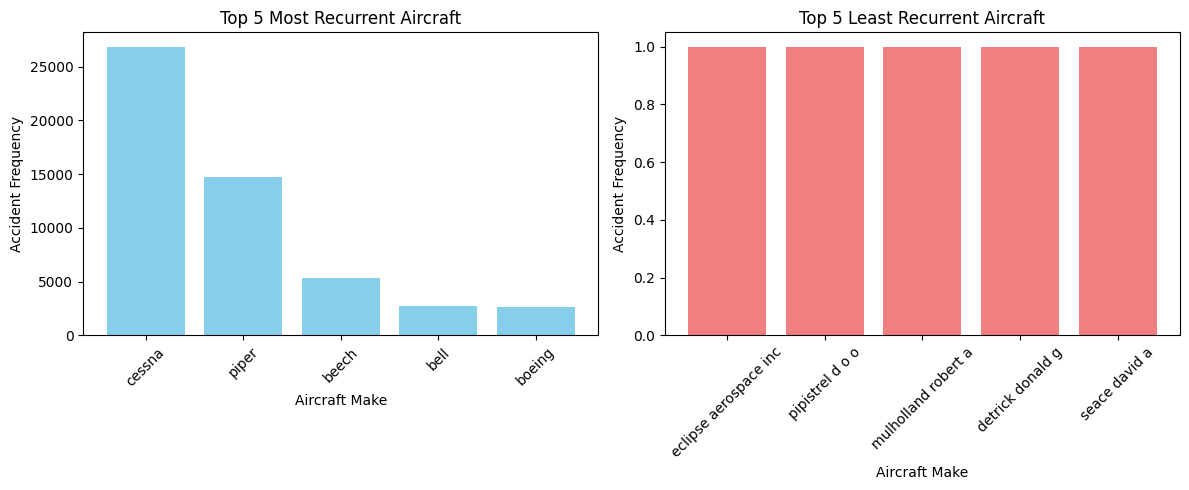

In [544]:
# We will graph in one figure the top 5 most recurrent Aircrafts and the least 5  recurrent.

# Retrieve top and least recurrent aircraft makes.
most_recurrent = df2['Make'].value_counts().head(5)
least_recurrent = df2['Make'].value_counts().tail(5)

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the most recurrent aircraft
axes[0].bar(most_recurrent.index, most_recurrent.values, color='skyblue')
axes[0].set_title('Top 5 Most Recurrent Aircraft')
axes[0].set_xlabel('Aircraft Make')
axes[0].set_ylabel('Accident Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot the least recurrent aircraft
axes[1].bar(least_recurrent.index, least_recurrent.values, color='lightcoral')
axes[1].set_title('Top 5 Least Recurrent Aircraft')
axes[1].set_xlabel('Aircraft Make')
axes[1].set_ylabel('Accident Frequency')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()




#### Analysis :
Now, we might mistakenly believe that the least recurrent aircraft are the safest, but that’s not necessarily true. The fact that these aircraft have fewer recorded accidents could simply mean that they have operated fewer flights, reducing their chances of incidents rather than proving their reliability.

To accurately answer this question, we need the total number of flights for each aircraft make and calculate accident rates. Only by comparing accident rates can we determine which aircraft make could be considered the most reliable.

For example, if the aircraft make Cessna has the most accidents, it might simply indicate that it has operated the most flights. However, when analyzing accident rates, it could actually be among the most reliable aircraft in terms of avoiding accidents.

A simple solution could be to pick one of the least recurrent aircraft models that is recognized for its popularity and reliability.

However, the dataset is not up to date. Any analysis conducted will only be representative of the approximate range from 1982 to 2023, with slight variations depending on the aircraft make.




### How has accident frequency evolved over the years for certain countries?
The new aviation division would want this information to :
- Evaluate safety trends --> Assess whether accident rates have decreased due to improved regulations and technology.

- Identify high-risk regions --> Determine which countries have consistently high accident frequencies and investigate possible causes.

- Improve fleet management --> Make informed decisions about aircraft acquisition based on reliability across regions.

- Support policy decisions --> Use data-driven insights to enhance aviation safety measures and operational guidelines.


N.B: Not all analyses can be completed within this single notebook. Some questions will be raised, and insights will be provided, but for further analysis, a position or contract may need to be established with the  data analyst who conducted the project. Contact information will be provided at the end.

In [545]:
# let's add a column 'Event_Year' to the DataFrame:
df2['Event_Year'] = df2['Event_Date'].apply(lambda x: str(x)[:4])


<ipython-input-545-c82a6687abc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event_Year'] = df2['Event_Date'].apply(lambda x: str(x)[:4])


#### The top 4 countries with the most aviation accidents will be represented in the plot below.

<ipython-input-546-89628cc2f3a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Event_Year"] = df2["Event_Year"].astype(int)


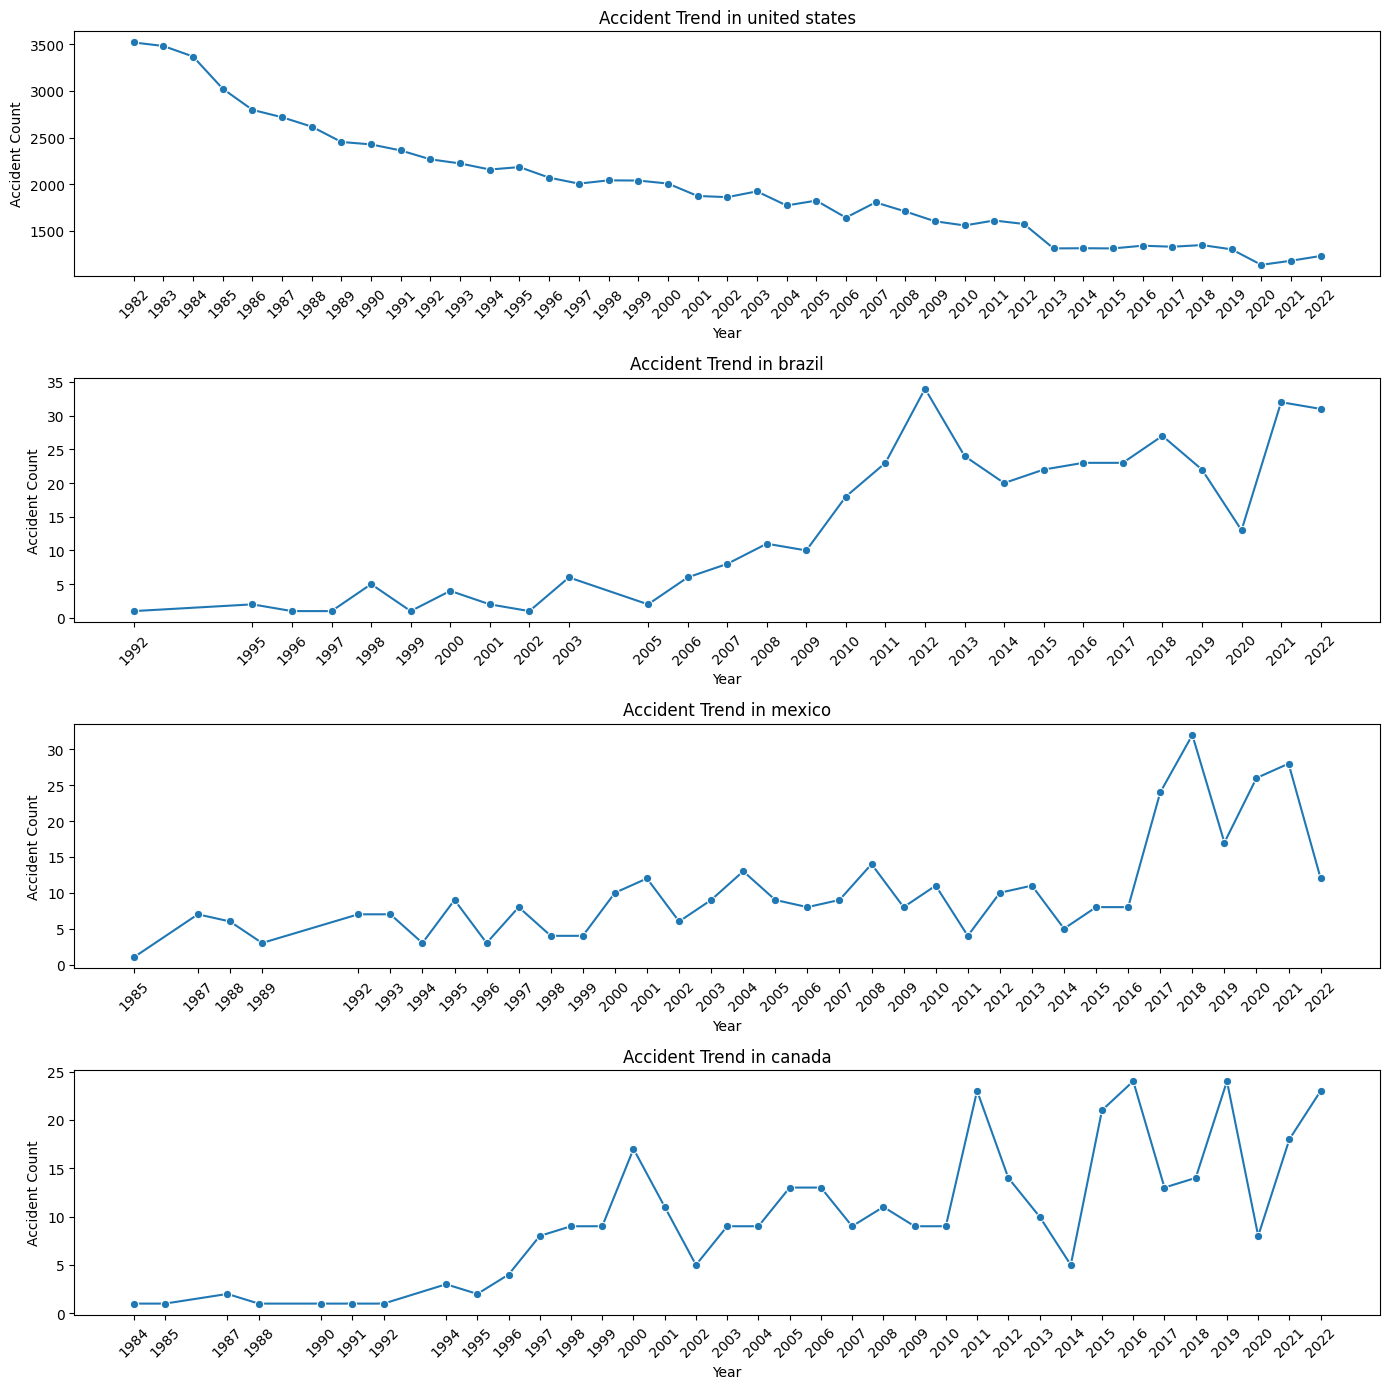

In [546]:
# Convert "Event_Year" to integer format
df2["Event_Year"] = df2["Event_Year"].astype(int)

# Get the top 4 countries  with the most accidents (excluding "UNKNOWN")
most_affected_countries = df2["Country"].value_counts().head(5).index.tolist()
most_affected_countries = [country for country in most_affected_countries if country != "UNKNOWN"]

# Filter DataFrame to start from 1982 or the earliest registered year for each country.
filtered_data = df2[df2["Event_Year"] >= 1982]

# Aggregate accident frequencies per year for each country
accident_trends = filtered_data.groupby(["Event_Year", "Country"]).size().reset_index(name="Accident_Count")


fig, axes = plt.subplots(4, 1, figsize=(14, 14))

# We will Loop through the first 4 most affected countries and plot accident trends
for i, country in enumerate(most_affected_countries[:4]):
    country_accidents = accident_trends[accident_trends["Country"] == country]

    sns.lineplot(data=country_accidents, x="Event_Year", y="Accident_Count", ax=axes[i], marker='o')
    axes[i].set_title(f"Accident Trend in {country}")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Accident Count")

    # Ensure consistent x-axis formatting across all graphs
    axes[i].set_xticks(sorted(country_accidents["Event_Year"].unique()))
    axes[i].tick_params(axis='x', rotation=45)

# Improve spacing for clear visualization
plt.tight_layout()









### Analysis:
The head of the new aviation division might consider avoiding or conducting further research before initiating airplane operations in countries such as Canada and Mexico.

However, since the dataset is not up to date, additional analysis is strongly recommended, as significant changes in aviation trends may occur in the years after 2022.

###For which flight purpose have accidents been most frequent?

In [547]:
# take a look on the different purpose of flight
df2['Purpose_of_flight'].value_counts()

,count
Purpose_of_flight,
personal,49076
unknown,12731
instructional,10442
aerial application,4686
business,3971
positioning,1632
other work use,1250
ferry,806
aerial observation,787


Text(0, 0.5, 'Number of Accidents')

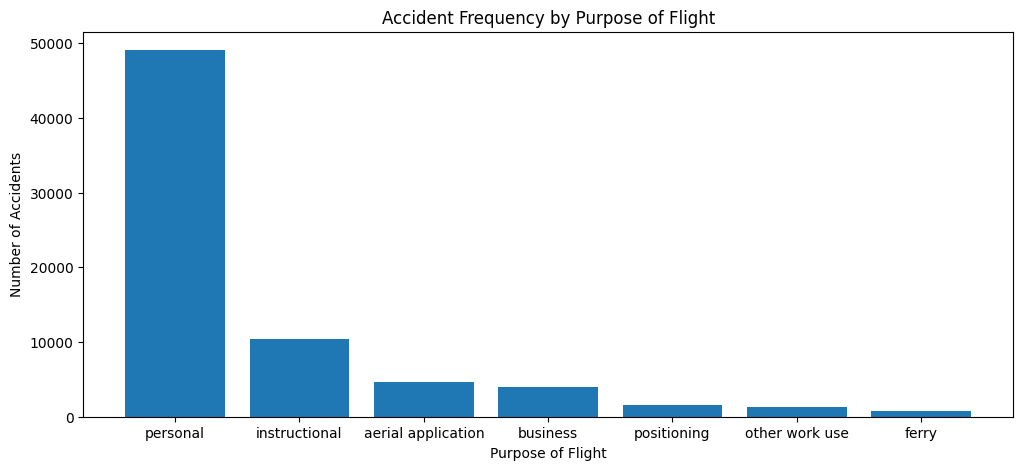

In [548]:
# Remove both "Unknown" and "UNKNOWN" entries from the dataset
purpose_of_flight = df2[~df2["Purpose_of_flight"].isin(["unknown"])]["Purpose_of_flight"].value_counts().head(7)


fig, ax = plt.subplots(figsize=(12, 5))  # Fixed typo

# Plot bar chart
ax.bar(purpose_of_flight.index, purpose_of_flight.values)
ax.set_title("Accident Frequency by Purpose of Flight")
ax.set_xlabel("Purpose of Flight")
ax.set_ylabel("Number of Accidents")




#### Analysis:
N.B: This graph does not show which purpose of flight is most likely to cause an accident. It only presents accident frequency, not accident rates.

For example, personal flights may have the highest accident count simply because they account for more aircraft operations overall. The frequency might prompt the head of the new aviation division to take specific measures regarding the most recurrent flight purposes, but it should not be assumed that higher frequency directly correlates with a higher accident rate.

### How resistant are certain aircraft Make to accidents?

In [549]:
# Let's take a look at the Aircraft_damage unique entries first.
df2['Aircraft_damage'].value_counts(5)

,proportion
Aircraft_damage,
substantial,0.723596
destroyed,0.209230
unknown,0.036634
minor,0.030540


#### The 5 Aircraft Makes with the most aviation accidents will be represented in the plot below.

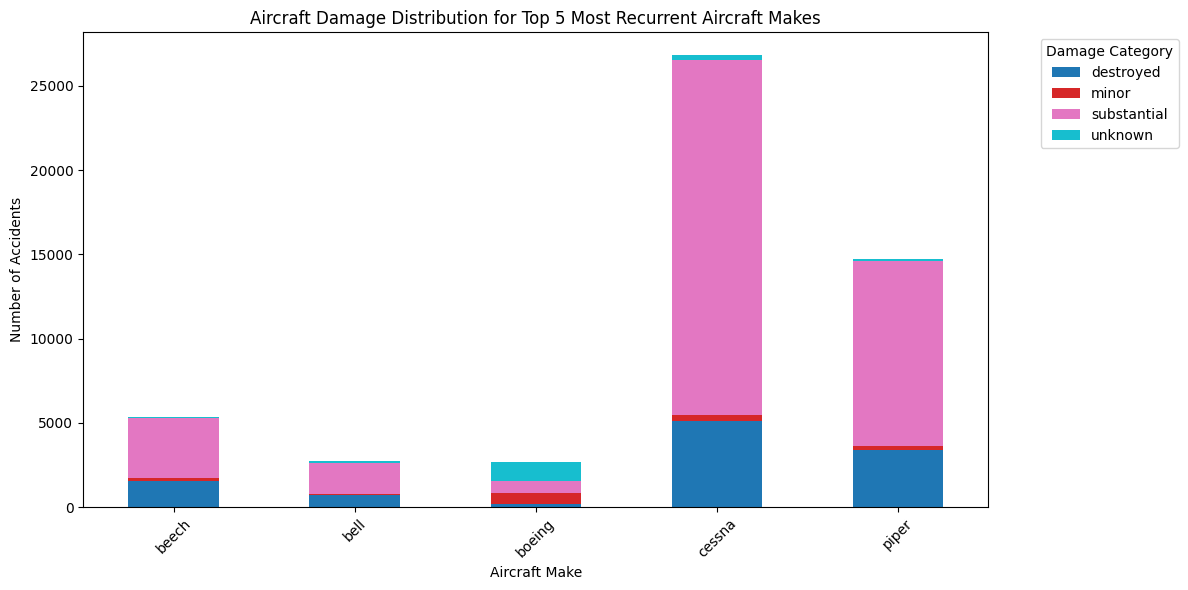

In [550]:
# Get the 5 most recurrent Aircraft Makes
top_5_makes = df2['Make'].value_counts().head(5).index

# Filter dataset to include only the top 5 aircraft makes
filtered_df = df2[df2['Make'].isin(top_5_makes)]

# Aggregate aircraft damage counts per make
damage_counts = filtered_df.groupby('Make')['Aircraft_damage'].value_counts().unstack().fillna(0)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
damage_counts.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

# Set labels and title
ax.set_title("Aircraft Damage Distribution for Top 5 Most Recurrent Aircraft Makes")
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Number of Accidents")
ax.legend(title="Damage Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()




#### Analysis
We can tell from the plot above that Cessna has experienced significantly more accidents than other aircraft makes for the years studied. Additionally, its aircraft have been found in a destroyed state more frequently than others.

The cause could be that Cessna has operated more flights, or it might be directly related to the aircraft's structural resilience or operational management.

###How well are passengers protected in the event of an aircraft crash?

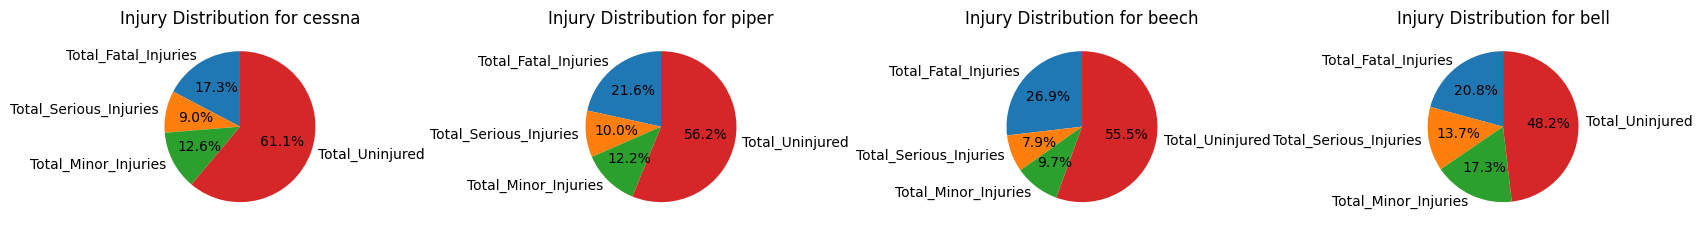

In [569]:
# this will be better answered with an interactive dashboard that will be submitted along with this notebook.
# for this analysis, we will provide an answer for the 4 most recurrent aircraft makes.
# 5 pie charts will be provided.

# Get the 4 most recurrent aircraft makes
# Get the 4 most recurrent aircraft makes
top_4_makes = df2['Make'].value_counts().head(4)


# Create figure and axes for  pie charts
fig, axes = plt.subplots(1, 4, figsize=(17, 10))

# Loop through each aircraft make and generate a pie chart
for i, make in enumerate(top_4_makes.index):
    # Filter data for the specific aircraft make
    make_data = df2[df2['Make'] == make][['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']]

    # Sum injury types
    injury_counts = make_data.sum()

    # Generate pie chart
    axes[i].pie(injury_counts, labels=list(injury_counts.index), autopct="%1.1f%%", startangle=90)
    axes[i].set_title(f"Injury Distribution for {make}")

# Improve layout for clarity
plt.tight_layout()
plt.show()





### Analysis:
Even though the previous plot indicated that Cessna has sustained the most accidents, this analysis reveals that among the four most recurrent aircraft makes, Cessna tends to have a higher proportion of uninjured occupants and a lower number of total fatal injuries.

##Summary
For this analysis, we have used
